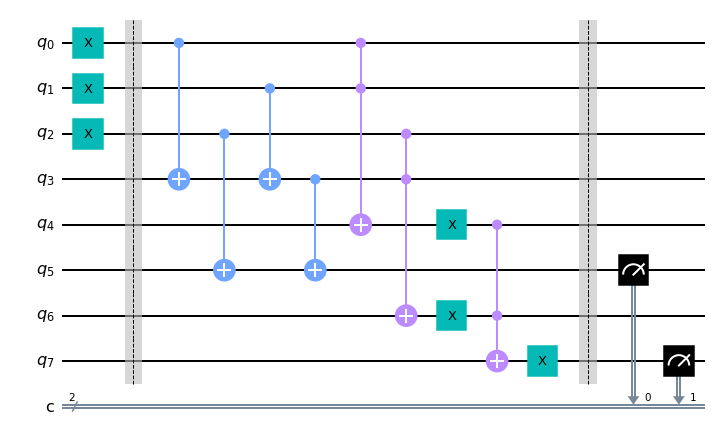

In [26]:
from qiskit import *
from qiskit.visualization import plot_histogram

full_adder = QuantumCircuit(8,2)

full_adder.x(0)  #Input 1 Keep = 1, Comment = 0
full_adder.x(1)  #Input 2
full_adder.x(2)  #Input 3

full_adder.barrier()

full_adder.cx(0,3)  # XOR Pins 0,3 Output at 3
full_adder.cx(1,3)  # XOR Pins 1,3 Output at 3

full_adder.cx(2,5)  # XOR Pins 2,5 Output at 5
full_adder.cx(3,5)  # XOR Pins 3,5 Output at 5

full_adder.ccx(0,1,4)  # AND Pins 0,1 Output at 4
full_adder.ccx(2,3,6)  # AND Pins 2,3 Output at 6

full_adder.x(4)  # NOT Pins 4 Makes NAND of Pins 0,1 with Output at 4
full_adder.x(6)  # NOT Pins 6 Makes NAND of Pins 2,3 with Output at 6

full_adder.ccx(4,6,7)  # AND Pins 4,6 Output at 7
full_adder.x(7)  # NOT Pins 7 Makes NAND of Pins 4,6 with Output at 7
# Which makes an OR Gate on Pins 4,6 with Output at 7

full_adder.barrier()

full_adder.measure(5,0)
full_adder.measure(7,1)

full_adder.draw(output="mpl")

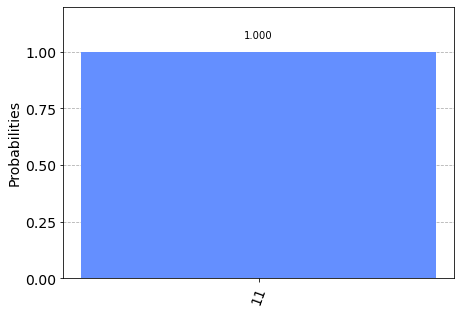

In [25]:
counts = execute(full_adder, Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)